In [95]:
import random
import numpy
from deap import base, creator, tools
import matplotlib.pyplot as plt
import math

from functions1 import *

In [96]:
# generate random points
n_fixed_points = 10
fixed_vertices = []
for i in range(n_fixed_points):
    point = [0,0]
    #random.seed(i+8) # for the last 6 vertices graph
    random.seed(i+28)
    point[0] = random.random()
    point[1] = random.random()
    fixed_vertices.append(point)
#fixed_vertices

In [97]:
# Creating Classes
creator.create('FitnessMin', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.FitnessMin)

c:\Users\MARIELLA\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\MARIELLA\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [98]:
#IND_SIZE = 2 * (n_fixed_points//2)
IND_SIZE = 2 * (n_fixed_points - 2)
TOURN_SIZE = 10

toolbox = base.Toolbox()
toolbox.register('attr_float', lambda: random.random())

# Individuals
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_float, n=IND_SIZE) 

# Population
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

### Operators ###

# Crossover
toolbox.register('mate', tools.cxBlend, alpha=0.5)

# Mutation
toolbox.register('mutate', tools.mutGaussian, mu=0, sigma=0.3)

# Selection
toolbox.register('select', tools.selTournament, tournsize=TOURN_SIZE)
toolbox.register('select_r', tools.selRoulette)

# Evaluation
toolbox.register('evaluation', evaluation)

In [99]:
#Statistical Features
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)


In [100]:
def GA(POP_SIZE, CXPB, MUTPB, NGEN, stats):
    #Defininf Hall of Fame
    hof = tools.HallOfFame(1)
    
    #Creating the population
    pop = toolbox.population(n=POP_SIZE)
    #print(pop)

    #Defining the Logbook
    logbook = tools.Logbook()
    logbook.header = ["gen", "nevals"] + (stats.fields if stats else[])

    #Evaluate the entire population
    temp_fixed_vertices = duplicate_fixverts(fixed_vertices, POP_SIZE)
    fitness = list(map(toolbox.evaluation, pop, temp_fixed_vertices))
    for ind, fit in zip(pop, fitness):
        ind.fitness.values = [fit]


    hof.update(pop) if stats else {}

    record = stats.compile(pop) if stats else {}
    logbook.record(gen=0, nevals=len(pop), **record)
    

    for g in range(NGEN):
        #print('Generation Number ', g, 'Population ', pop)
        print("Generatioin Number ", g)
        #Select the next generation individuals
        #offspring = toolbox.select_r(pop, len(pop))
        offspring = toolbox.select(pop, len(pop))
        
        #Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))

        #Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2],offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1,child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant, indpb=0.5)
                del mutant.fitness.values

        #Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitness = list(map(toolbox.evaluation, invalid_ind, temp_fixed_vertices))
        for ind, fit in zip(invalid_ind, fitness):
            ind.fitness.values = [fit]

        if hof is not None:
            hof.update(offspring)
            #print(hof)

        #The population in entirely replaced by the offspring
        pop[:] = tools.selBest(offspring, POP_SIZE-1)
        pop.append(hof[0])

        record = stats.compile(pop) if stats else{}
        #print(record)
        logbook.record(gen=g+1, nevals=len(invalid_ind), **record)
        

    return pop, logbook, hof

In [101]:
GA_exe = GA(POP_SIZE=400,CXPB=0.9,MUTPB=0.1,NGEN=100, stats=stats)

Generatioin Number  0
Generatioin Number  1
Generatioin Number  2
Generatioin Number  3
Generatioin Number  4
Generatioin Number  5
Generatioin Number  6
Generatioin Number  7
Generatioin Number  8
Generatioin Number  9
Generatioin Number  10
Generatioin Number  11
Generatioin Number  12
Generatioin Number  13
Generatioin Number  14
Generatioin Number  15
Generatioin Number  16
Generatioin Number  17
Generatioin Number  18
Generatioin Number  19
Generatioin Number  20
Generatioin Number  21
Generatioin Number  22
Generatioin Number  23
Generatioin Number  24
Generatioin Number  25
Generatioin Number  26
Generatioin Number  27
Generatioin Number  28
Generatioin Number  29
Generatioin Number  30
Generatioin Number  31
Generatioin Number  32
Generatioin Number  33
Generatioin Number  34
Generatioin Number  35
Generatioin Number  36
Generatioin Number  37
Generatioin Number  38
Generatioin Number  39
Generatioin Number  40
Generatioin Number  41
Generatioin Number  42
Generatioin Number  4

In [102]:
#GA_exe[1]

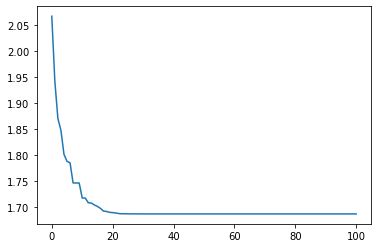

In [103]:
import matplotlib.pyplot as plt
min_values = [GA_exe[1][i]['min'] for i in range(len(GA_exe[1]))]
ngen = [i for i in range(len(GA_exe[1]))]

fig = plt.plot(ngen, min_values)
plt.show()

In [104]:
import math
print(math.dist([0.1,0.1],[0.4,0.1]))
print(math.dist([0.25,0.36],[0.4,0.1]))
print(math.dist([0.1,0.1],[0.25,0.36]))


0.30000000000000004
0.30016662039607267
0.30016662039607267


In [105]:
# best point(s) found so far
point = GA_exe[2][0]
print(point)

[0.44542638937764784, 0.8597607715940213, 0.541203576874415, 0.4323189860363533, 0.3564068734762619, 0.1975933207769645, 0.5273714504213368, 0.24446262738579033, 0.5458792915866927, 0.3317958276452222, 0.47061178419372235, 0.8331240068845425, 0.6026792495597193, 0.17001813439775024, 0.5501629314359777, 0.7425111055825488]


before GA:


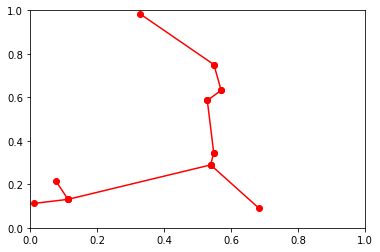

the total cost of the tree before is =  1.6916414261723633

after GA:


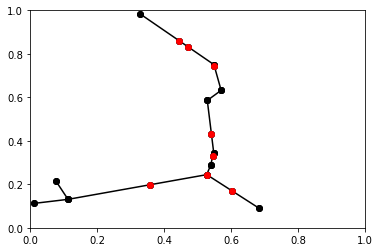

the total cost of the tree is =  1.6865633356331333


In [106]:
print("before GA:")
connections_before = prim_alg(fixed_vertices)
distances_before = grafo_new(connections_before)
total_length_before = 0
for i in distances_before:
    total_length_before += i
print("the total cost of the tree before is = ", total_length_before)


print("\nafter GA:")

steiner = ind_to_points(point)
allpoints = steiner + fixed_vertices

connections_after = prim_alg(allpoints)

temp = []
distances_after = []
for i in connections_after:
    temp.append([i[0],i[1]])
    distances_after.append(i[2])

for pair in temp:

    plt.plot(*zip(*pair), "ro-", c = 'black')

plt.plot(*zip(*fixed_vertices), 'o', c = 'black' )
plt.axis(xmin=0, xmax=1, ymin=0, ymax=1)
plt.plot(*zip(*steiner), 'o', c = 'red')
plt.show()


total_length_after = 0
for i in distances_after:
    total_length_after += i
print("the total cost of the tree is = ", total_length_after)

In [107]:
# opt_connections, last_steiner = opt_new(steiner, connections_after)
#     
# temp = []
# distances_after = []
# for i in opt_connections:
#     temp.append([i[0],i[1]])
#     distances_after.append(i[2])
# 
# for pair in temp:
#     plt.axis(xmin=0, xmax=1, ymin=0, ymax=1)
#     plt.plot(*zip(*pair), "ro-")
# plt.axis(xmin=0, xmax=1, ymin=0, ymax=1)
# plt.plot(*zip(*fixed_vertices), 'o', c = 'g' )
# plt.axis(xmin=0, xmax=1, ymin=0, ymax=1)
# plt.plot(*zip(*steiner), 'o', c = 'orange')
# plt.show()
# 
# 
# total_length_after = 0
# for i in distances_after:
#     total_length_after += i
# print("the total cost of the tree is = ", total_length_after)

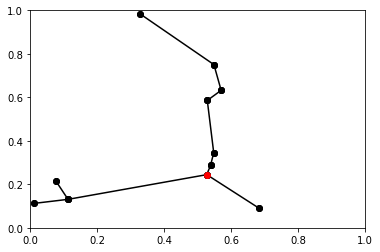

the total cost of the optimized tree is =  1.686563335632672


In [108]:
# new last cell
opt_connections, opt_steiner = opt_new(steiner, connections_after)

#grafo_new(opt_connections, opt_steiner)
#print(opt_connections)

temp = []
distances_after = []
for i in opt_connections:
    temp.append([i[0],i[1]])
    distances_after.append(i[2])
for pair in temp:
    plt.axis(xmin=0, xmax=1, ymin=0, ymax=1)
    plt.plot(*zip(*pair), "ro-", c = 'black')
plt.axis(xmin=0, xmax=1, ymin=0, ymax=1)
plt.plot(*zip(*fixed_vertices), 'o', c = 'black' )
plt.axis(xmin=0, xmax=1, ymin=0, ymax=1)
plt.plot(*zip(*opt_steiner), 'o', c = 'red')
plt.show()
total_length_after = 0
for i in distances_after:
    total_length_after += i
print("the total cost of the optimized tree is = ", total_length_after)